# **Import Neccessary library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read Dataset

In [ ]:
dt=pd.read_csv("/content/diamonds_ready_for_ML (2).csv")

In [ ]:
dt.head()

In [ ]:


# Map column names to their respective results
result_mapping = {
    'I1': 'I1',
    'IF': 'IF',
    'SI1': 'SI1',
    'SI2': 'SI2',
    'VS1': 'VS1',
    'VS2': 'VS2',
    'VVS1': 'VVS1',
    'VVS2': 'VVS2'
}

# Add a 'Result' column
dt['Result'] = dt[['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2']].idxmax(axis=1)
dt['Result'] = dt['Result'].map(result_mapping)
dt.drop(columns=['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'], inplace=True)
# Save the updated file
dt.to_excel('updated_file.xlsx', index=False)


In [ ]:
df=pd.read_excel("/content/updated_file.xlsx")

In [ ]:
df.head()

,carat,cut,depth,table,price,x,y,z,D,E,F,G,H,I,J,Result
0,0.23,1,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,0,0,0,SI2
1,0.21,2,59.8,61.0,326,3.89,3.84,2.31,0,1,0,0,0,0,0,SI1
2,0.23,4,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,0,VS1
3,0.29,2,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,0,1,0,VS2
4,0.31,4,63.3,58.0,335,4.34,4.35,2.75,0,0,0,0,0,0,1,SI2


Sanity check of data

In [ ]:
df.shape

(53940, 24)

In [ ]:
#finding missing
df.isnull().sum()

,0
carat,0
cut,0
depth,0
table,0
price,0
x,0
y,0
z,0
D,0
E,0


In [ ]:
#find duplicates
df.duplicated().sum()

146

In [ ]:
#identifing garbage value
for i in df.select_dtypes(include="object").columns:
  print(df[i].value_counts())
  print("***"*10)

Result
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64
******************************


Exploratory Data Analysis(EDA)

In [ ]:
#descriptive statistics (we get basic understanding of data how it distributed)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
cut,53940.0,2.095903,1.116600,1.0,1.00,2.00,3.00,5.00
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80
D,53940.0,0.125603,0.331404,0.0,0.00,0.00,0.00,1.00
E,53940.0,0.181628,0.385541,0.0,0.00,0.00,0.00,1.00


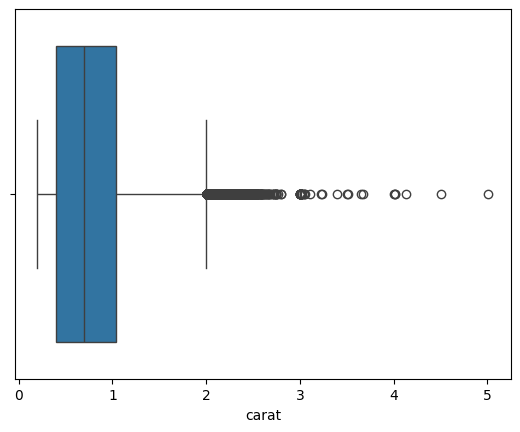

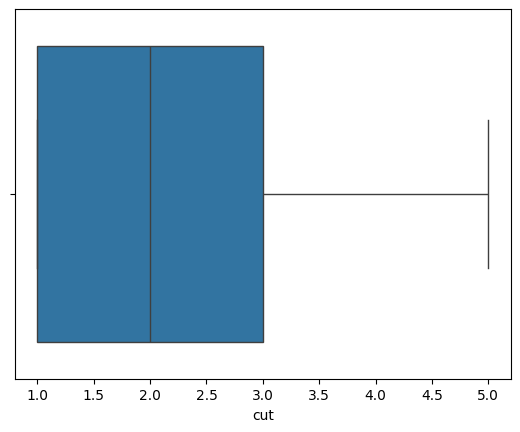

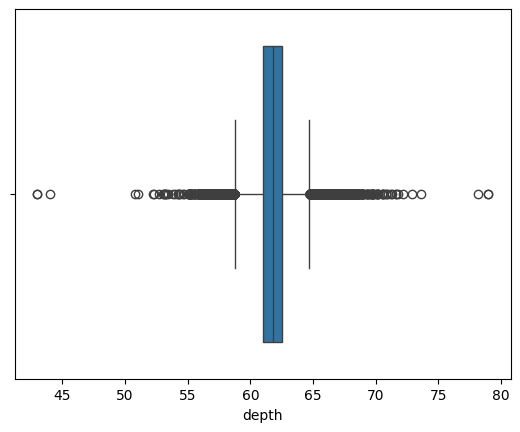

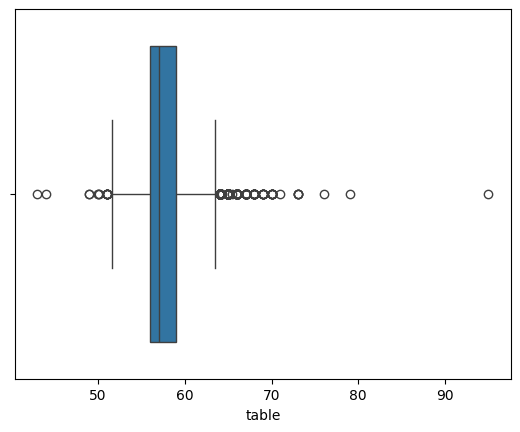

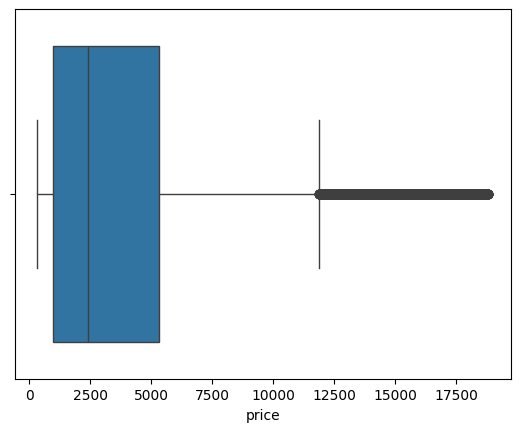

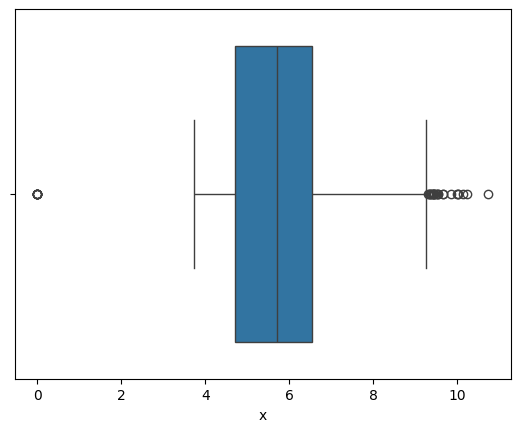

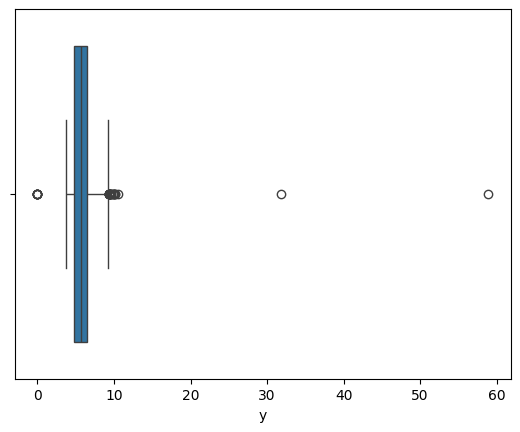

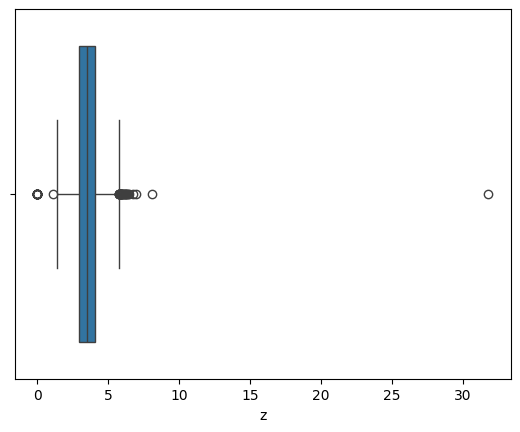

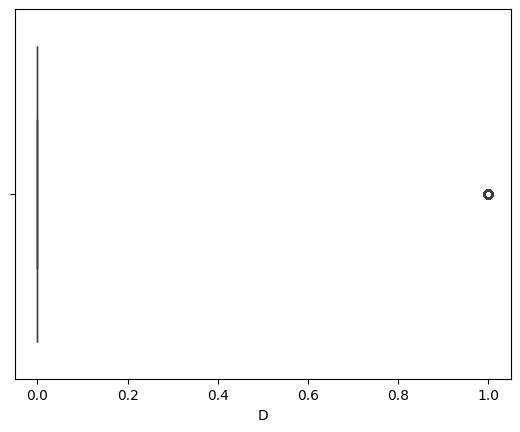

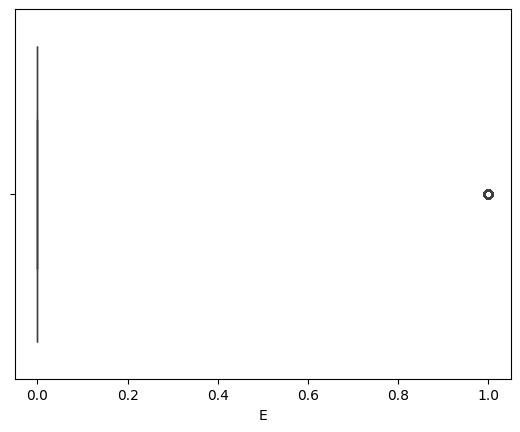

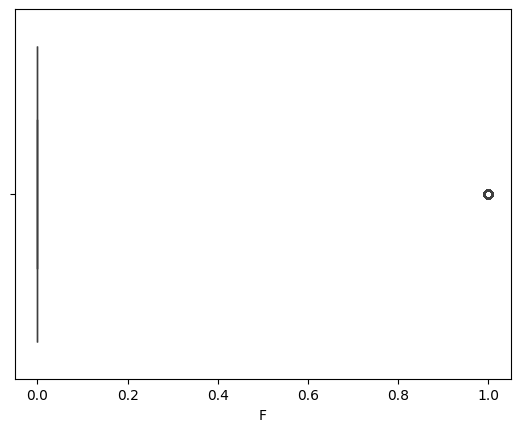

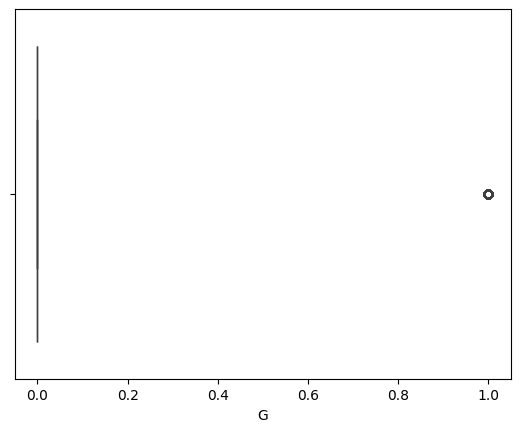

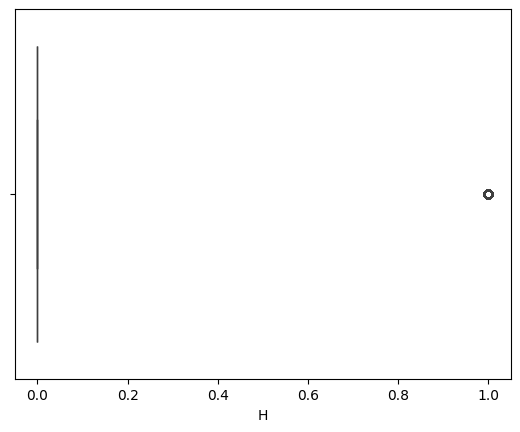

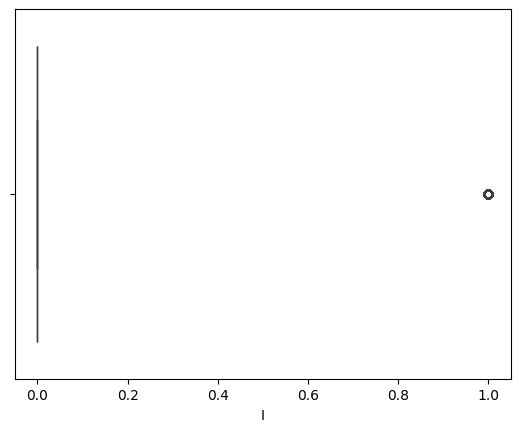

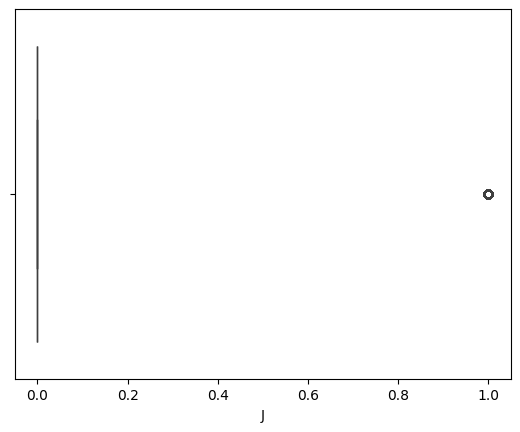

In [ ]:
#Boxplot to identify outliers
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

In [ ]:
#scatter plot to understand the relationship
df.columns

Index(['carat', 'cut', 'depth', 'table', 'price', 'x', 'y', 'z', 'D', 'E', 'F',
       'G', 'H', 'I', 'J', 'Result'],
      dtype='object')

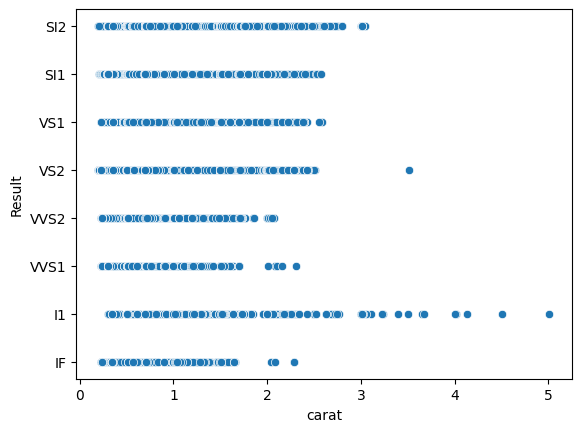

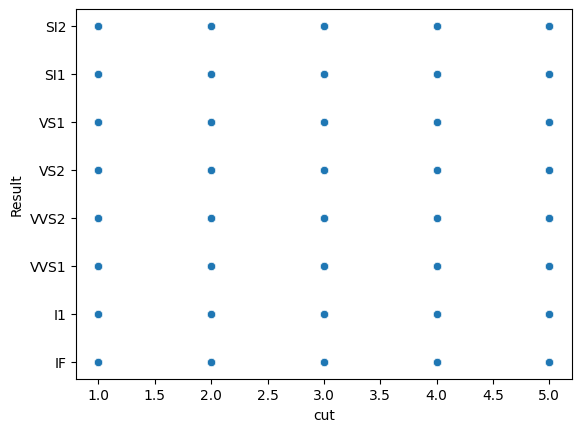

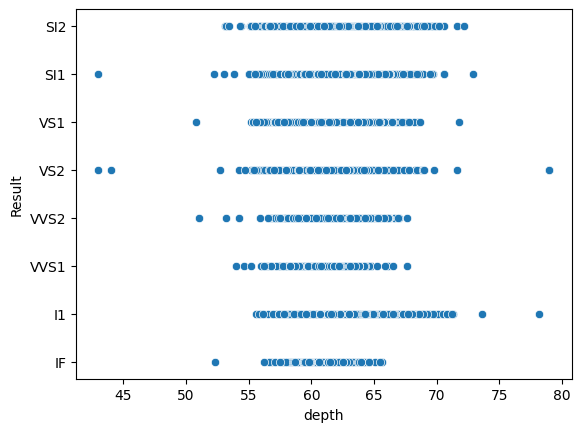

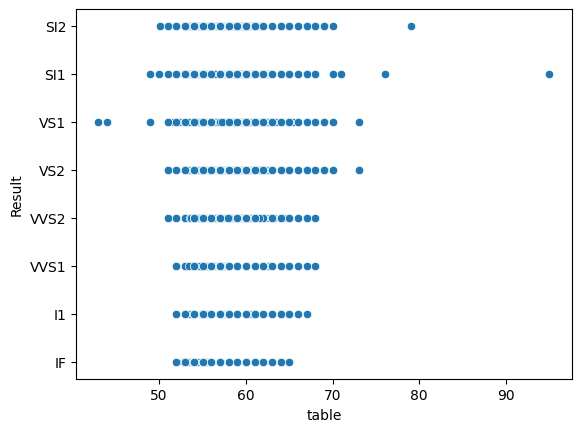

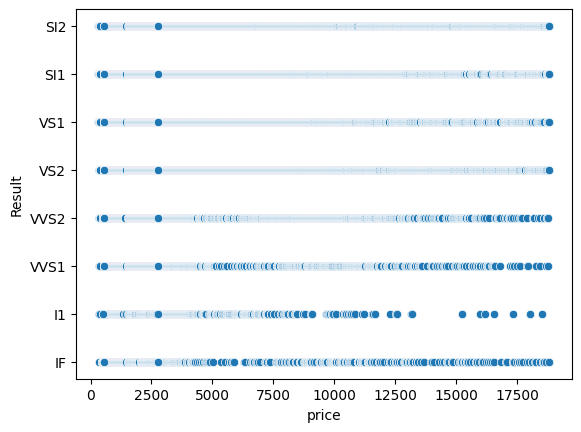

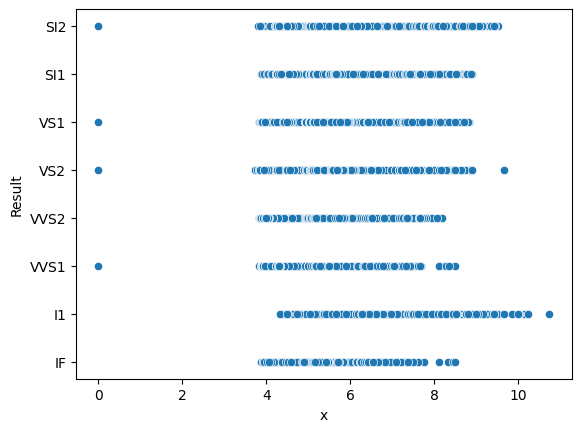

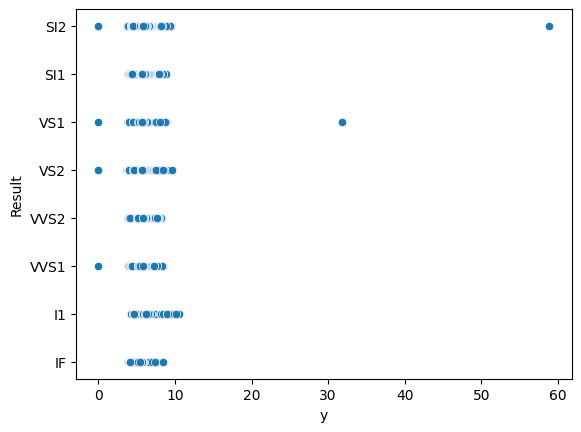

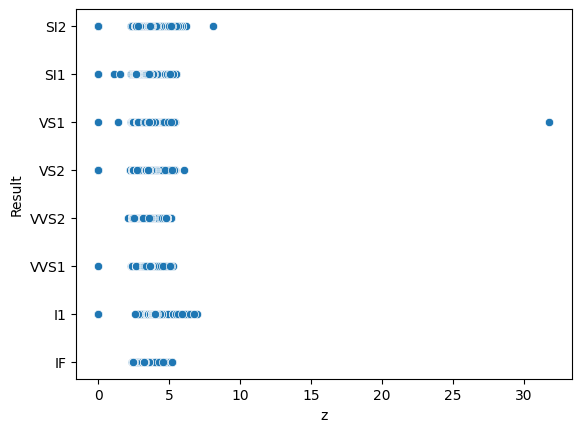

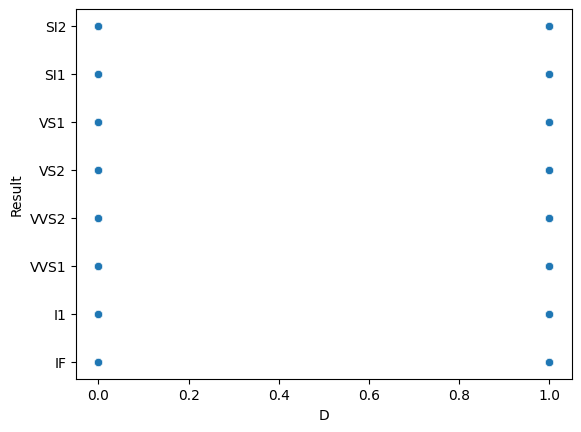

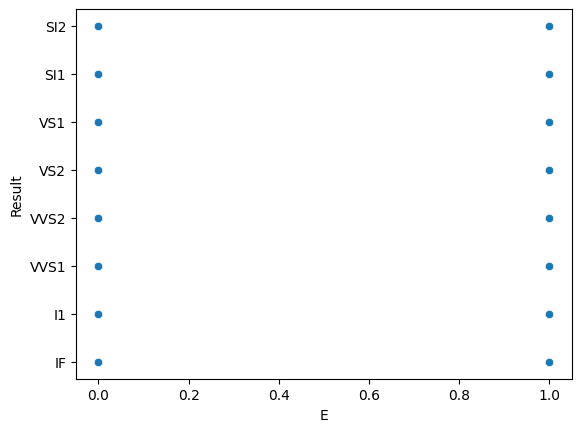

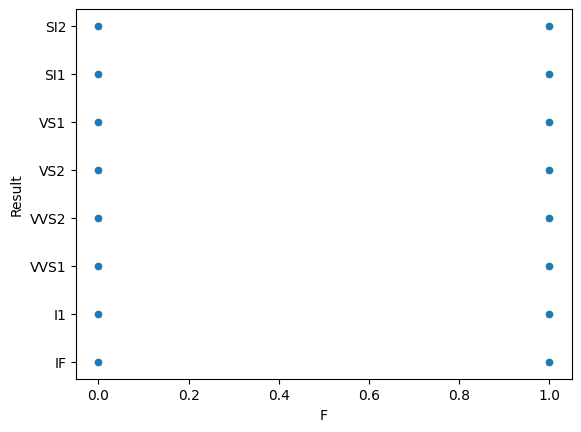

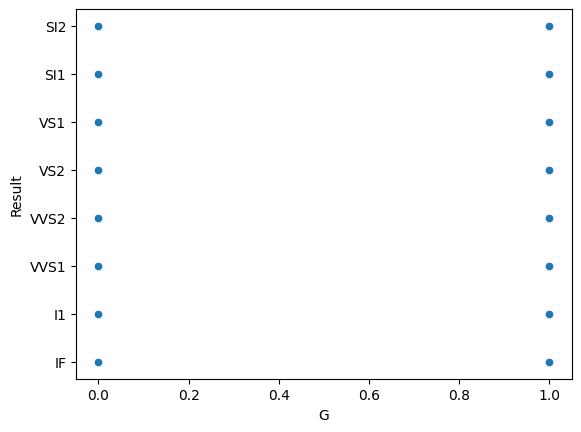

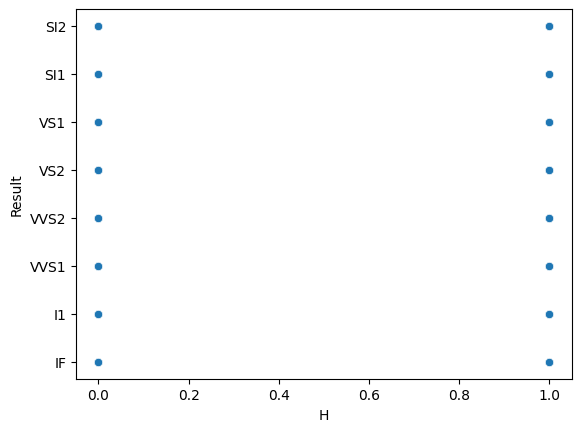

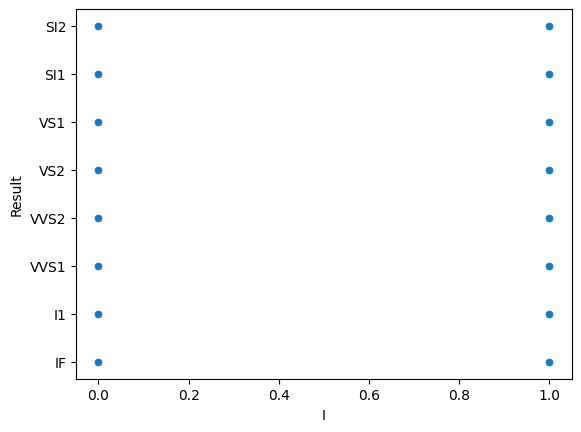

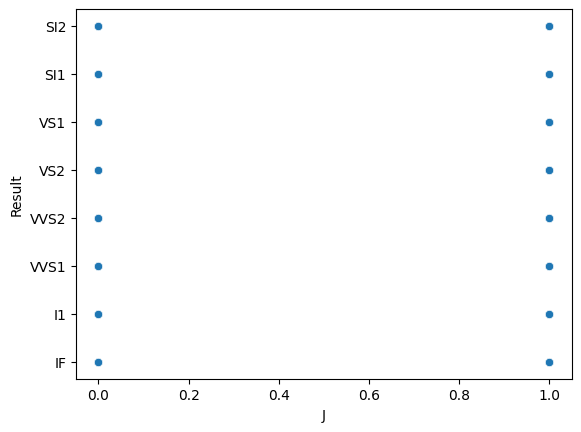

In [ ]:
for i in['carat', 'cut', 'depth', 'table', 'price', 'x', 'y', 'z','D', 'E', 'F', 'G', 'H',
       'I', 'J']:
       sns.scatterplot(data=df,x=i,y='Result')
       plt.show()

In [ ]:
#correlation with heatmap to interpret the relation and multicolliniarity
s=df.select_dtypes(include="number").corr()

<Axes: >

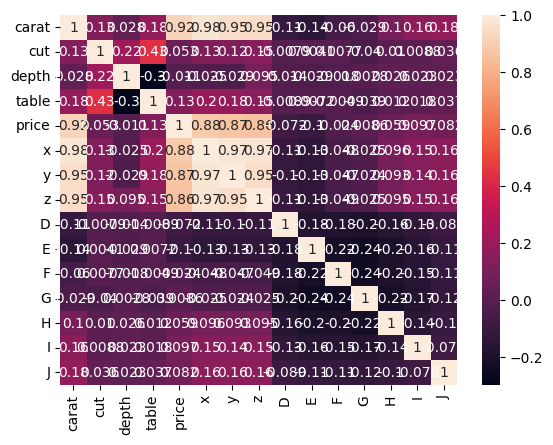

In [ ]:
sns.heatmap(s,annot=True)

Missing value treatments

In [ ]:
#choose the method of imputing missing value
#like mean,median,mode,KNNIputer

In [ ]:
df.isnull().sum()

,0
carat,0
cut,0
depth,0
table,0
price,0
x,0
y,0
z,0
D,0
E,0


In [ ]:
df=df.drop_duplicates()

Outliers treatments

In [ ]:
#decide whether to do outliers tratment or not ,if do how?
def wisker(col):
  q1,q3=np.percentile(col,[25,75])
  iqr=q3-q1
  lw=q1-(1.5*iqr)
  uw=q3+(1.5*iqr)
  return lw,uw

In [ ]:
wisker(df['carat'])

(-0.5599999999999999, 2.0)

In [ ]:
df.columns

Index(['carat', 'cut', 'depth', 'table', 'price', 'x', 'y', 'z', 'D', 'E', 'F',
       'G', 'H', 'I', 'J', 'Result'],
      dtype='object')

In [ ]:
for i in [ 'x', 'y', 'z']:
  lw,uw=wisker(df[i])
  df[i]=np.where(df[i]<lw,lw,df[i])
  df[i]=np.where(df[i]>uw,uw,df[i])

In [ ]:
df.columns

Index(['carat', 'cut', 'depth', 'table', 'price', 'x', 'y', 'z', 'D', 'E', 'F',
       'G', 'H', 'I', 'J', 'Result'],
      dtype='object')

duplicates and garbage value treatment

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.head()

,carat,cut,depth,table,price,x,y,z,D,E,F,G,H,I,J,Result
0,0.23,1,61.50,55.0,326.0,3.95,3.98,2.43,0,1,0,0,0,0,0,SI2
1,0.21,2,59.80,61.0,326.0,3.89,3.84,2.31,0,1,0,0,0,0,0,SI1
2,0.23,4,58.75,63.5,327.0,4.05,4.07,2.31,0,1,0,0,0,0,0,VS1
3,0.29,2,62.40,58.0,334.0,4.20,4.23,2.63,0,0,0,0,0,1,0,VS2
4,0.31,4,63.30,58.0,335.0,4.34,4.35,2.75,0,0,0,0,0,0,1,SI2


Encoding of data

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
data_encoded = df.copy()

for col in ['Result']:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le
print(data_encoded)

       carat  cut  depth  table   price     x     y     z  D  E  F  G  H  I  \
0       0.23    1  61.50   55.0   326.0  3.95  3.98  2.43  0  1  0  0  0  0   
1       0.21    2  59.80   61.0   326.0  3.89  3.84  2.31  0  1  0  0  0  0   
2       0.23    4  58.75   63.5   327.0  4.05  4.07  2.31  0  1  0  0  0  0   
3       0.29    2  62.40   58.0   334.0  4.20  4.23  2.63  0  0  0  0  0  1   
4       0.31    4  63.30   58.0   335.0  4.34  4.35  2.75  0  0  0  0  0  0   
...      ...  ...    ...    ...     ...   ...   ...   ... .. .. .. .. .. ..   
53935   0.72    1  60.80   57.0  2757.0  5.75  5.76  3.50  1  0  0  0  0  0   
53936   0.72    4  63.10   55.0  2757.0  5.69  5.75  3.61  1  0  0  0  0  0   
53937   0.70    3  62.80   60.0  2757.0  5.66  5.68  3.56  1  0  0  0  0  0   
53938   0.86    2  61.00   58.0  2757.0  6.15  6.12  3.74  0  0  0  0  1  0   
53939   0.75    1  62.20   55.0  2757.0  5.83  5.87  3.64  1  0  0  0  0  0   

       J  Result  
0      0       3  
1      0     

In [ ]:
# Step 3: Features and target
X = data_encoded.drop(columns=['Result'])
y = data_encoded['Result']

In [ ]:
from sklearn.preprocessing import StandardScaler
# Step 3.1: Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from imblearn.over_sampling import SMOTE
# Step 4: Apply SMOTE to balance the data
smote = SMOTE(random_state=42, k_neighbors=3)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Step 5: Split the balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.3, random_state=42, stratify=y_balanced
)

In [ ]:
param_grid = {
    'C': [1, 10, 100],  # Try fewer values
    'gamma': [0.01, 0.1, 1],  # Limited range
    'kernel': ['rbf']
}

In [ ]:
from sklearn.svm import SVC
# Step 7: Perform GridSearchCV for hyperparameter tuning of SVM
grid_search = GridSearchCV(SVC(), param_grid, cv=3, verbose=1, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

In [ ]:

# Step 8: Extract the best parameters and the best model
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_svm = grid_search.best_estimator_

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Step 9: Evaluate the best SVM model on the test set
y_pred_best_svm = best_svm.predict(X_test)
accuracy_best_svm = accuracy_score(y_test, y_pred_best_svm)
report_best_svm = classification_report(y_test, y_pred_best_svm, target_names=label_encoders['Result'].classes_)

In [ ]:
  # Step 10: Print results
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.2f}")
print(f"Test Set Accuracy: {accuracy_best_svm:.2f}")
print("Classification Report:")
print(report_best_svm)

Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.60
Test Set Accuracy: 0.62
Classification Report:
              precision    recall  f1-score   support

          I1       0.95      0.99      0.97      3919
          IF       0.68      0.82      0.75      3919
         SI1       0.57      0.57      0.57      3920
         SI2       0.75      0.74      0.75      3920
         VS1       0.46      0.45      0.45      3920
         VS2       0.49      0.46      0.47      3919
        VVS1       0.52      0.50      0.51      3920
        VVS2       0.51      0.46      0.48      3919

    accuracy                           0.62     31356
   macro avg       0.62      0.62      0.62     31356
weighted avg       0.62      0.62      0.62     31356

